In [1]:
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

In [2]:
final_data = pd.read_csv('Stemmed_Data.csv').astype(str)

In [3]:
kamus = pd.read_csv('Kamus.txt')
dictionary = pd.read_csv('english3.txt')

In [4]:
kamus

,Kamus
0,aba
1,abad
2,abadi
3,abadiah
4,abah
...,...
29925,zulmat
29926,zulu
29927,zurafah
29928,zuriah


In [5]:
dictionary

,Dictionary
0,a
1,aa
2,aaa
3,aachen
4,aardvark
...,...
194428,zymotically
194429,zymurgy
194430,zyrian
194431,zyrians


In [6]:
kamus_id = []

for w in kamus['Kamus']:
    kamus_id.append(w)
    
dict_en = []

for e in dictionary['Dictionary']:
    dict_en.append(e)

In [7]:
word_to_append = ["corona", "jokowi", "covid", "sars"]

for k in word_to_append:
    if k in kamus_id:
        print(k)
        continue
    else:
        kamus_id.append(k)

In [8]:
words_not_in_kamus = []

In [9]:
stopwords_id = pd.read_csv('stopwords-id.txt', delimiter='\n')
display(stopwords_id)

stop_words_en = set(stopwords.words('english'))

,Stopwords
0,a
1,ah
2,acara
3,ada
4,adalah
...,...
915,yang
916,yap
917,yg
918,yo


In [10]:
words = []

for i in final_data['Content']:
    temp = []
    result = word_tokenize(i)
    
    for j in result:
        if j in stopwords_id['Stopwords'].values:
            continue
        elif j in stop_words_en:
            continue
        else:
            if j in kamus_id:
                temp.append(j)
            elif j in dict_en:
                temp.append(j)
            else:
                if j in words_not_in_kamus:
                    continue
                else:
                    words_not_in_kamus.append(j)
    
    words.append(temp)

In [11]:
words.to_csv(r'words_for_model.csv')

AttributeError: 'list' object has no attribute 'to_csv'

In [14]:
count = 0

for w in words_not_in_kamus:
    count += 1
    
print(count)

89371


In [31]:
count_w = 0
words_list = []

for w in words:
    for c in w:
        count_w += 1
        if c not in words_list:
            words_list.append(c)
        else:
            continue
    
print(count_w)

4205707


In [18]:
# print(words_not_in_kamus)
not_in_kamus = pd.DataFrame(words_not_in_kamus, columns = ['Not in Kamus'])
not_in_kamus

,Not in Kamus
0,kapolri
1,uu
2,ite
3,restoratif
4,sigit
...,...
89366,arianti
89367,anaya
89368,farmasibanda
89369,lomoditi


In [29]:
not_in_kamus.to_csv(r'Not_in_kamus.csv')

In [34]:
words_list = pd.DataFrame(words_list, columns = ['Words'])

In [35]:
words_list.to_csv(r'word_list.csv')

In [1]:
from gensim.models import Word2Vec

In [37]:
model = Word2Vec(words, min_count=1, size=100, window=10, sg=1) # Skip

In [38]:
model.save("test.model")

In [2]:
model = Word2Vec.load('test.model')

In [5]:
model.most_similar("indonesia")

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('roes', 0.6186543107032776),
 ('nayar', 0.594764232635498),
 ('speciality', 0.590900182723999),
 ('inga', 0.5905005931854248),
 ('fundamen', 0.5848464965820312),
 ('pads', 0.5826586484909058),
 ('rupa', 0.5802242755889893),
 ('recognisable', 0.5799263715744019),
 ('uh', 0.578758180141449),
 ('tingkal', 0.577498197555542)]

In [41]:
from elang.plot.utils import plot2d
from elang.plot.utils import plotNeighbours

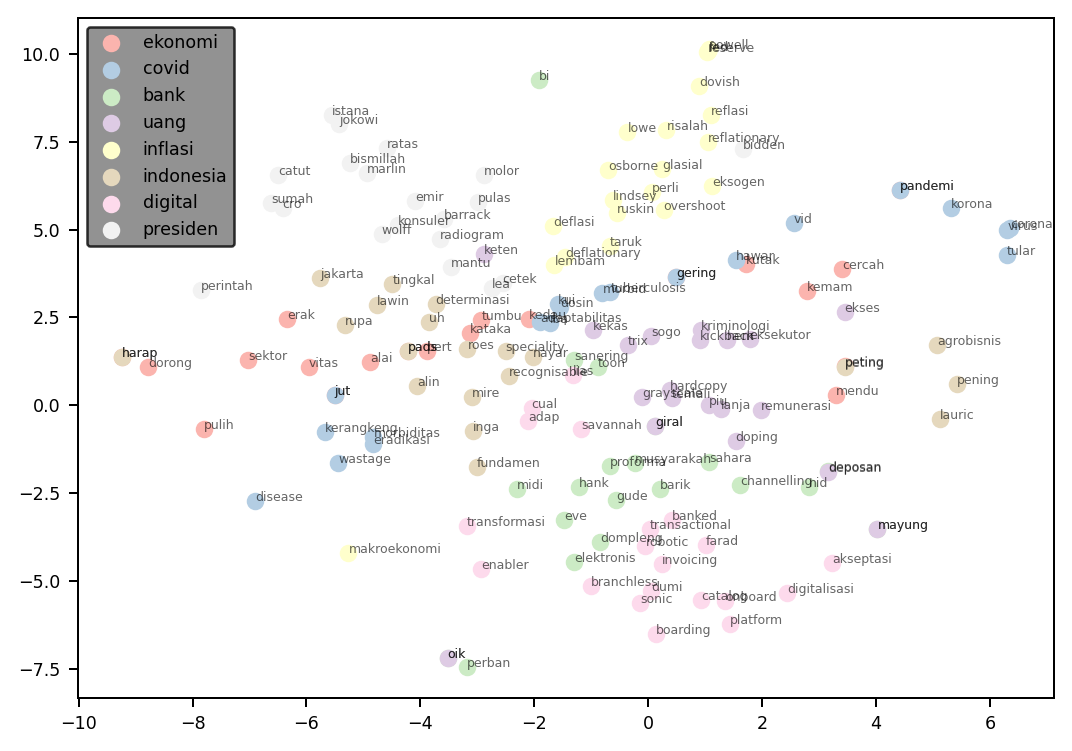

In [42]:
words = ['ekonomi', 'covid', 'bank', 'uang', 'inflasi', 'indonesia', 'digital', 'presiden']

plotNeighbours(model, 
    words, 
    method="TSNE", 
    k=20,
    draggable=True)